# KONKURS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

Rozważmy zbiór Diabetes

In [2]:
diabetes = datasets.load_diabetes()
# print description
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [3]:
print(diabetes.data)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [4]:
# get the data
diabetes_X = diabetes.data
diabetes_Y = diabetes.target

Podzielmy zbiór na część testową i treningową .

In [5]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-50]
diabetes_X_test = diabetes_X[-50:]
 
# Split the targets into training/testing sets
diabetes_y_train = diabetes_Y[:-50]
diabetes_y_test = diabetes_Y[-50:]

# KONKURS
Proszę nuczyć model na <tt>diabetes_X_train</tt>.

NIE WOLNO UZYWAĆ <tt>diabetes_X_test</tt>


In [6]:
from sklearn import model_selection
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [19]:
# prepare models
models = []

models.append(('LR1', make_pipeline(PolynomialFeatures(), linear_model.LinearRegression())))
# models.append(('LR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression())))
models.append(('RR1_0.1', make_pipeline(PolynomialFeatures(), linear_model.Ridge(alpha=0.1))))
models.append(('LR2_0.01', make_pipeline(PolynomialFeatures(2), linear_model.Lasso(alpha=0.01)) ))
models.append(('El1', make_pipeline(PolynomialFeatures(), linear_model.ElasticNet(alpha=0.01, l1_ratio=0.01, normalize=True)) ))
models.append(('RF10', RandomForestRegressor(max_depth=5,random_state=5) ))
models.append(('NN2020', MLPRegressor(hidden_layer_sizes=(20, 20),activation='identity',alpha=20,max_iter=100) ))

# evaluate each model in turn
results = []
names = []

In [20]:
seed=123
kfold = model_selection.KFold(n_splits=10, random_state=seed)
scoring = 'neg_mean_absolute_error'
#scoring = 'r2'

In [21]:
for name, model in models:
    cv_results = model_selection.cross_val_score(model, diabetes_X_train, diabetes_y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s  MEAN: %f STD: (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR1  MEAN: -47.581904 STD: (5.040762)
RR1_0.1  MEAN: -46.151901 STD: (5.245816)
LR2_0.01  MEAN: -45.598285 STD: (5.230312)
El1  MEAN: -53.650210 STD: (6.358052)
RF10  MEAN: -48.308420 STD: (4.859649)
NN2020  MEAN: -123.067477 STD: (10.895569)


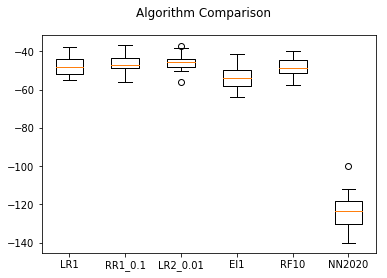

In [22]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [23]:
from sklearn import  metrics


for name, model in models:
    model.fit(diabetes_X_train,diabetes_y_train)
    print(name)
    print("R^2: {}".format(metrics.r2_score(diabetes_y_test, model.predict(diabetes_X_test)) ))
    print("Explained variance score: {}".format( metrics.explained_variance_score(diabetes_y_test, model.predict(diabetes_X_test)) ))
    print("Median absolute error: {}".format( metrics.median_absolute_error(diabetes_y_test, model.predict(diabetes_X_test)) ))
    print("Mean squared error: {}".format( metrics.mean_squared_error(diabetes_y_test, model.predict(diabetes_X_test)) ))
    print("Mean absolute errors: {}".format(metrics.mean_absolute_error(diabetes_y_test, model.predict(diabetes_X_test)) ))


LR1
R^2: 0.464569383284
Explained variance score: 0.464597790681
Median absolute error: 31.6871999754
Mean squared error: 3165.60801639
Mean absolute errors: 42.2176781793
RR1_0.1
R^2: 0.673065787629
Explained variance score: 0.673209534197
Median absolute error: 33.0017896962
Mean squared error: 1932.92189726
Mean absolute errors: 34.2100838697
LR2_0.01
R^2: 0.703109843919
Explained variance score: 0.703654266804
Median absolute error: 22.8180406326
Mean squared error: 1755.29345678
Mean absolute errors: 32.4740179127
El1
R^2: 0.373463993563
Explained variance score: 0.373812813332
Median absolute error: 57.4652532373
Mean squared error: 3704.24727802
Mean absolute errors: 52.7132026897
RF10
R^2: 0.563315115966
Explained variance score: 0.564927100982
Median absolute error: 37.6186785671
Mean squared error: 2581.79701792
Mean absolute errors: 42.7504459227
NN2020
R^2: -2.46241879087
Explained variance score: 0.0624759354927
Median absolute error: 112.291516634
Mean squared error: 2047

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
grid_lr = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()), 
                       param_grid={'polynomialfeatures__degree': [1, 2, 3, 4]},
                    cv=kfold,
                    refit=True)
grid_lr.fit(diabetes_X_train,diabetes_y_train)
grid_lr.best_params_

{'polynomialfeatures__degree': 1}

In [26]:
grid_ls = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.Lasso(alpha=1)),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                    'lasso__alpha': [0.1, 1, 2, 3, 0.01]},
                    cv=kfold,
                    refit=True)
grid_ls.fit(diabetes_X_train, diabetes_y_train)
grid_rf

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPRegressor(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1, 10, 20], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'hidden_layer_sizes': [(20, 20), (10, 10), 10, 20]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
grid_rf = GridSearchCV(MLPRegressor(hidden_layer_sizes=(10,10,10),activation='tanh',alpha=0.001,max_iter=100),#model powinien byc zainicjalizowany
                    param_grid={'hidden_layer_sizes': [(20,20),(10,10), (10), (20)],
                                'alpha': [1, 10,20],
                               'activation': ['identity', 'logistic', 'tanh', 'relu']                               
                               },#parametry do podstawienia
                    cv=5,#na ile czesci ma dzielic zbior
                    n_jobs=1,
                    refit=False)
grid_rf.fit(diabetes_X_train,diabetes_y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=MLPRegressor(activation='tanh', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1, 10, 20], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'hidden_layer_sizes': [(20, 20), (10, 10), 10, 20]},
       pre_dispatch='2*n_jobs', refit=False, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
grid_rf.best_params_

In [29]:
import statsmodels.formula.api as sm